In [1]:
import numpy as np
import random as rnd
import matplotlib
import matplotlib.pyplot as plt
import time
import pandas as pd

In [31]:
L = 81

title = '_bw_L81_avg10000_mc20_after50000mc_seed'

tc = 1/(np.log(2**0.5+1)/2) # 2.269185314213022
t = pd.read_csv('export/e'+title+'1.csv').columns
t = list(map(float,t))

#===================================================================================================

df_e,df_m=[pd.DataFrame(columns=t) for i in range(2)]

for i in range(1,9):
    dfe = pd.read_csv('export/e'+title+str(i)+'.csv')
    dfm = pd.read_csv('export/m'+title+str(i)+'.csv')
    
    df_e=df_e.append(dfe, ignore_index=True) #append to global dfs
    df_m=df_m.append(dfm, ignore_index=True) #append to global dfs


df_e.tail()

,1.588,1.815,2.042,2.156,2.246,2.258,2.265,2.267,2.271,2.274,2.281,2.292,2.383,2.496,2.723,2.95
79995,-1.982929,-1.984758,-1.910380,-1.864655,-1.655540,-1.634202,-1.613474,-1.298887,-1.534217,-1.242189,-1.319006,-1.076970,-1.006859,-0.877610,-0.762384,-0.666667
79996,-1.990855,-1.972565,-1.921353,-1.878067,-1.629934,-1.614083,-1.574455,-1.325103,-1.534827,-1.254382,-1.322664,-1.126962,-0.982472,-0.862978,-0.727633,-0.709953
79997,-1.989636,-1.969517,-1.912818,-1.834172,-1.620180,-1.591526,-1.573236,-1.346441,-1.510440,-1.240969,-1.286084,-1.123304,-0.970279,-0.883707,-0.741655,-0.691663
79998,-1.991465,-1.970736,-1.907331,-1.831733,-1.631154,-1.532998,-1.536656,-1.280597,-1.522024,-1.289742,-1.275720,-1.151959,-0.959305,-0.850785,-0.733730,-0.698369
79999,-1.993294,-1.968298,-1.901844,-1.820759,-1.601280,-1.610425,-1.535437,-1.303155,-1.487273,-1.226337,-1.239750,-1.158665,-0.966011,-0.923335,-0.751410,-0.692273


In [32]:
len_t = len(t)
runs = 8
chunk = int(len(df_e)/runs)

def calc_C(e,T):
    """Specific heat"""
    e2_ = np.mean(np.array(e)**2)   # <e^2> 
    e_2 = np.mean(e)**2             # <e>^2
    return (e2_ - e_2)/(T**2)

def calc_U(m):
    """Binder's cumulant"""
    m2 = np.array(m)**2   #m^2
    return 1-((np.mean(m2**2))/(3*np.mean(m2)**2))

U,C = [],[]
for j in range(runs):
    from_ = int(chunk*j)
    to_ = int(chunk*(j+1))
    evals = df_e.values[from_:to_]
    mvals = df_m.values[from_:to_]
    for i in range(len(t)):
        C += [calc_C(evals[:,i],t[i])]
        U += [calc_U(mvals[:,i])]
    
U_np = np.array(U).reshape(runs,len_t)
C_np = np.array(C).reshape(runs,len_t)
U_mean, U_std = [],[]
C_mean, C_std = [],[]
for k in range(len_t):
    up = U_np[:,k]
    cp = C_np[:,k]
    
    U_mean += [np.mean(up)]
    U_std += [np.std(up)]
    
    C_mean += [np.mean(cp)]
    C_std += [np.std(cp)]

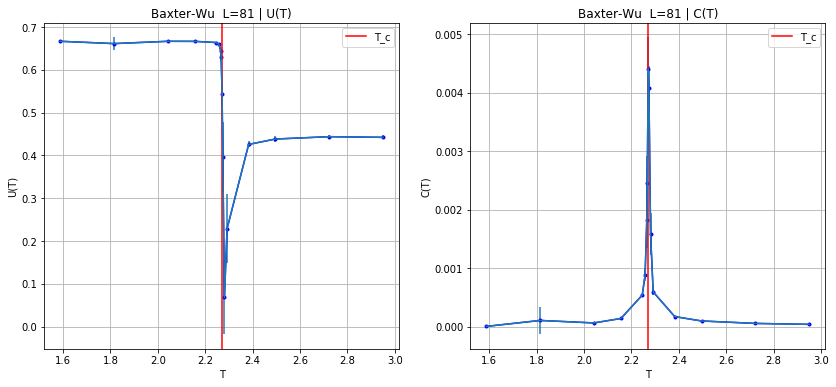

In [39]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(t, U_mean, '.-', c='blue')
plt.errorbar(t, U_mean, yerr=U_std)
plt.axvline(tc, 0, 1, c='r', label='T_c')
plt.title('Baxter-Wu  L=%d | U(T)'%(L))
plt.ylabel('U(T)')
plt.xlabel('T')
plt.legend()
plt.grid(True)


plt.subplot(1, 2, 2)
plt.plot(t, C_mean, '.-', c='blue')
plt.errorbar(t, C_mean, yerr=C_std)
plt.axvline(tc, 0, 1, c='r', label='T_c')
plt.title('Baxter-Wu  L=%d | C(T)'%(L))
plt.ylabel('C(T)')
plt.xlabel('T')
plt.legend()
plt.grid(True)